In [1]:
#basic libraries
import torch
import torchvision

In [17]:
#data loading and transforming
from torchvision.datasets import FashionMNIST
from torch.utils.data import DataLoader
from torchvision import transforms

from collections import OrderedDict

# The output of torchvision datasets are PILImage images of range [0, 1]. 
# We transform them to Tensors for input into a CNN

## Defining  a transform to read the data in as a tensor
data_transform = transforms.ToTensor()
 
#choosing the training and testing dataset
train_data = FashionMNIST(root='./data', train=True,
                                   download=True, transform=data_transform)

test_data = FashionMNIST(root='./data', train=False,
                                  download=True, transform=data_transform)


# Printing out some stats about the training and test data
print('Train data, number of images: ', len(train_data))
print('Test data, number of images: ', len(test_data)) 



Train data, number of images:  60000
Test data, number of images:  10000


##### <b>torch.utlis.data.Dataset</b> is a class representing a dataset.
The FashionMNIST class is an extension of this Dataset class and it allows us to
<br>
Load batches of image/label data.
<br>
Uniformly applying transformations to our data, such as turning all our images into Tensor's for training a neural network. 

<i> Tensors are similar to numpy arrays, but can also used on GPU to accelerate computing.

## Data iteration and batching

In [18]:
batch_size = 20;

train_loader= DataLoader(train_data, batch_size=batch_size,shuffle=True)

classes = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
           'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

###### <b>torch.utlis.data.DataLoader</b> is an iterator that allows us to batch and shuffle the data.

## Visualizing some training data

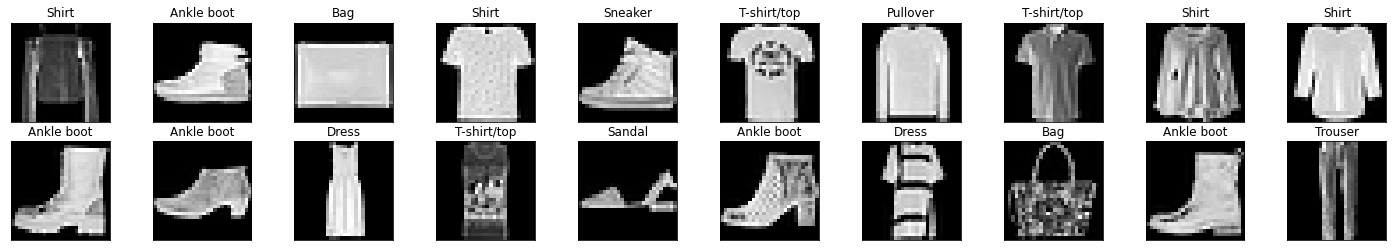

In [24]:
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

#to obtain one batch of training images
dataiter = iter(train_loader)
images, labels = dataiter.next()
images = images.numpy()

#plotting the images in the batch, along with the corresponding labels
fig = plt.figure(figsize=(25, 4))
for idx in np.arange(batch_size):
      ax = fig.add_subplot(2, batch_size/2, idx+1, xticks=[], yticks=[])
      ax.imshow(np.squeeze(images[idx]), cmap='gray')
      ax.set_title(classes[labels[idx]])


## Viewing an Image in more detail

The image in our dataset is 28x28 pixel, normalised, grayscale image.

#### Why normalisation is important?

Normalization ensures that, as we go through a feedforward and then backpropagation step in training our CNN, that each image feature will fall within a similar range of values and not overly activate any particular layer in our network. During the feedfoward step, a network takes in an input image and multiplies each input pixel by some convolutional filter weights (and adds biases!), then it applies some activation and pooling functions. Without normalization, it's much more likely that the calculated gradients in the backpropagaton step will be <b>quite large and cause our loss to increase instead of converge</b>.

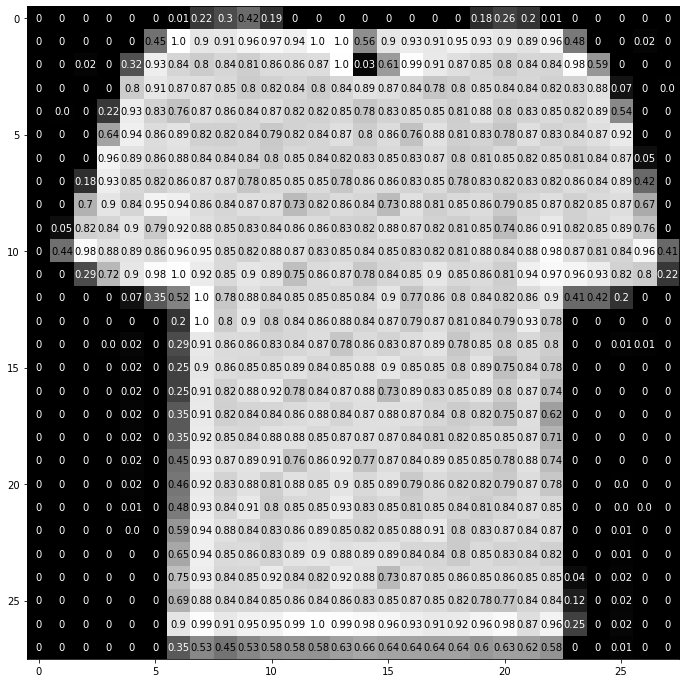

In [30]:
#selecting an image by index

idx = 3 # index value as 2
img = np.squeeze(images[idx]) #making the image in numpy

#displaying the pixel values in that image
fig = plt.figure(figsize=(12,12))
ax = fig.add_subplot(111)
ax.imshow(img, cmap='gray')
width, height = img.shape
thresh = img.max()/2.5
for x in range(width):
  for y in range(height):
    val = round(img[x][y],2) if img[x][y] !=0 else 0
    ax.annotate(str(val), xy=(y,x),
                    horizontalalignment='center',
                    verticalalignment='center',
                    color='white' if img[x][y]<thresh else 'black')